<a href="https://colab.research.google.com/github/MedulHasan/Machine-Learning/blob/master/DSE(Linear_Regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

In [ ]:
df = pd.read_csv('DSE-Data-Archive-February-to-date.csv')
df

,ID,DATE,TRADING_CODE,LTP*,HIGH,LOW,OPENP*,CLOSEP*,YCP,TRADE,VALUE (mn),VOLUME
0,1,8/20/2020,1JANATAMF,4.8,4.9,4.7,4.8,4.8,4.8,178,4.062,"852,763"
1,2,8/19/2020,1JANATAMF,4.9,5,4.7,4.7,4.8,4.7,241,7.355,"1,504,368"
2,3,8/18/2020,1JANATAMF,4.7,4.9,4.6,4.7,4.7,4.8,252,6.302,"1,323,469"
3,4,8/17/2020,1JANATAMF,4.6,5,4.6,4.7,4.8,4.6,398,12.461,"2,554,171"
4,5,8/16/2020,1JANATAMF,4.6,4.6,4.2,4.2,4.6,4.2,304,11.186,"2,481,973"
...,...,...,...,...,...,...,...,...,...,...,...,...
55989,55990,2/6/2020,ZEALBANGLA,40.1,42.9,40.1,42.9,40.8,40.8,24,0.310,"7,601"
55990,55991,2/5/2020,ZEALBANGLA,40.6,42.8,40.1,41.7,40.8,40.5,115,0.633,"15,310"
55991,55992,2/4/2020,ZEALBANGLA,40.6,41.9,39.2,41.9,40.5,40.1,9,0.025,615
55992,55993,2/3/2020,ZEALBANGLA,40.4,41.4,38.2,41.4,40.1,40.9,34,0.259,"6,418"


In [ ]:
#df['TRADING_CODE'].unique()

In [ ]:
df_fig = ['RDFOOD']
fig = df[(df['TRADING_CODE'].isin(df_fig))]
fig

,ID,DATE,TRADING_CODE,LTP*,HIGH,LOW,OPENP*,CLOSEP*,YCP,TRADE,VALUE (mn),VOLUME
26985,26986,8/20/2020,RDFOOD,12.7,13,12.3,12.4,12.8,12.4,376,8.734,"684,630"
26986,26987,8/19/2020,RDFOOD,12.3,12.8,12.3,12.7,12.4,12.5,422,10.565,"840,775"
26987,26988,8/18/2020,RDFOOD,12.7,13.1,12.4,13.1,12.5,13,492,14.524,"1,141,323"
26988,26989,8/17/2020,RDFOOD,12.9,13.6,12.8,13.4,13,13.3,615,23.964,"1,812,358"
26989,26990,8/16/2020,RDFOOD,13.2,13.6,13,13.4,13.3,13.4,696,22.418,"1,683,371"
...,...,...,...,...,...,...,...,...,...,...,...,...
27075,27076,2/6/2020,RDFOOD,14.6,14.7,14.2,14.3,14.6,14.3,304,8.838,"610,271"
27076,27077,2/5/2020,RDFOOD,14.2,14.7,14.2,14.5,14.3,14.6,346,11.785,"817,588"
27077,27078,2/4/2020,RDFOOD,14.7,14.8,14.4,14.7,14.6,14.7,318,15.151,"1,039,768"
27078,27079,2/3/2020,RDFOOD,14.6,15.2,14.5,14.5,14.7,14.4,936,74.909,"5,008,247"


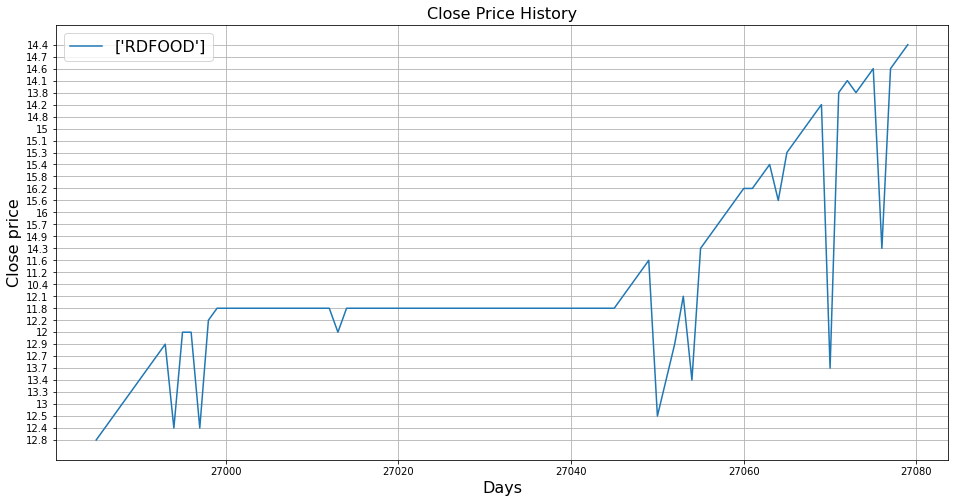

In [ ]:
#visulize the closing price
plt.figure(figsize=(16,8))
plt.title('Close Price History', fontsize=16)
plt.plot(fig['CLOSEP*'], label=df_fig)
plt.legend(loc="upper left", fontsize=16)
plt.xlabel('Days', fontsize=16)
plt.ylabel(('Close price'), fontsize=16)
plt.grid(True)
plt.show()

In [ ]:
df.isnull().sum()

ID              0
DATE            0
TRADING_CODE    0
LTP*            0
HIGH            0
LOW             0
OPENP*          0
CLOSEP*         0
YCP             0
TRADE           0
VALUE (mn)      0
VOLUME          0
dtype: int64

In [ ]:
dummie = pd.get_dummies(df.TRADING_CODE)
dummie

,1JANATAMF,1STPRIMFMF,AAMRANET,AAMRATECH,ABB1STMF,ABBANK,ACFL,ACI,ACIFORMULA,ACMELAB,ACTIVEFINE,ADNTEL,ADVENT,AFCAGRO,AFTABAUTO,AGNISYSL,AGRANINS,AIBL1STIMF,AIL,AL-HAJTEX,ALARABANK,ALIF,ALLTEX,AMANFEED,AMBEEPHA,AMCL(PRAN),ANLIMAYARN,ANWARGALV,APEXFOODS,APEXFOOT,APEXSPINN,APEXTANRY,APOLOISPAT,APSCLBOND,ARAMIT,ARAMITCEM,ARGONDENIM,ASIAINS,ASIAPACINS,ATCSLGF,...,T5Y1012,T5Y1013,T5Y1014,T5Y1015,T5Y1111,T5Y1112,T5Y1113,T5Y1114,T5Y1115,T5Y1211,T5Y1212,T5Y1213,T5Y1214,T5Y1215,TAKAFULINS,TALLUSPIN,TITASGAS,TOSRIFA,TRUSTB1MF,TRUSTBANK,TUNGHAI,UCB,UNIONCAP,UNIQUEHRL,UNITEDAIR,UNITEDFIN,UNITEDINS,UPGDCL,USMANIAGL,UTTARABANK,UTTARAFIN,VAMLBDMF1,VAMLRBBF,VFSTDL,WATACHEM,WMSHIPYARD,YPL,ZAHEENSPIN,ZAHINTEX,ZEALBANGLA
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55989,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
55990,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
55991,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
55992,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
marge = pd.concat([df, dummie], axis=1)
marge

,ID,DATE,TRADING_CODE,LTP*,HIGH,LOW,OPENP*,CLOSEP*,YCP,TRADE,VALUE (mn),VOLUME,1JANATAMF,1STPRIMFMF,AAMRANET,AAMRATECH,ABB1STMF,ABBANK,ACFL,ACI,ACIFORMULA,ACMELAB,ACTIVEFINE,ADNTEL,ADVENT,AFCAGRO,AFTABAUTO,AGNISYSL,AGRANINS,AIBL1STIMF,AIL,AL-HAJTEX,ALARABANK,ALIF,ALLTEX,AMANFEED,AMBEEPHA,AMCL(PRAN),ANLIMAYARN,ANWARGALV,...,T5Y1012,T5Y1013,T5Y1014,T5Y1015,T5Y1111,T5Y1112,T5Y1113,T5Y1114,T5Y1115,T5Y1211,T5Y1212,T5Y1213,T5Y1214,T5Y1215,TAKAFULINS,TALLUSPIN,TITASGAS,TOSRIFA,TRUSTB1MF,TRUSTBANK,TUNGHAI,UCB,UNIONCAP,UNIQUEHRL,UNITEDAIR,UNITEDFIN,UNITEDINS,UPGDCL,USMANIAGL,UTTARABANK,UTTARAFIN,VAMLBDMF1,VAMLRBBF,VFSTDL,WATACHEM,WMSHIPYARD,YPL,ZAHEENSPIN,ZAHINTEX,ZEALBANGLA
0,1,8/20/2020,1JANATAMF,4.8,4.9,4.7,4.8,4.8,4.8,178,4.062,"852,763",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,8/19/2020,1JANATAMF,4.9,5,4.7,4.7,4.8,4.7,241,7.355,"1,504,368",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,8/18/2020,1JANATAMF,4.7,4.9,4.6,4.7,4.7,4.8,252,6.302,"1,323,469",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,8/17/2020,1JANATAMF,4.6,5,4.6,4.7,4.8,4.6,398,12.461,"2,554,171",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,8/16/2020,1JANATAMF,4.6,4.6,4.2,4.2,4.6,4.2,304,11.186,"2,481,973",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55989,55990,2/6/2020,ZEALBANGLA,40.1,42.9,40.1,42.9,40.8,40.8,24,0.310,"7,601",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
55990,55991,2/5/2020,ZEALBANGLA,40.6,42.8,40.1,41.7,40.8,40.5,115,0.633,"15,310",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
55991,55992,2/4/2020,ZEALBANGLA,40.6,41.9,39.2,41.9,40.5,40.1,9,0.025,615,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
55992,55993,2/3/2020,ZEALBANGLA,40.4,41.4,38.2,41.4,40.1,40.9,34,0.259,"6,418",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
final_df = marge.drop(['TRADING_CODE'], axis=1)
final_df

,ID,DATE,LTP*,HIGH,LOW,OPENP*,CLOSEP*,YCP,TRADE,VALUE (mn),VOLUME,1JANATAMF,1STPRIMFMF,AAMRANET,AAMRATECH,ABB1STMF,ABBANK,ACFL,ACI,ACIFORMULA,ACMELAB,ACTIVEFINE,ADNTEL,ADVENT,AFCAGRO,AFTABAUTO,AGNISYSL,AGRANINS,AIBL1STIMF,AIL,AL-HAJTEX,ALARABANK,ALIF,ALLTEX,AMANFEED,AMBEEPHA,AMCL(PRAN),ANLIMAYARN,ANWARGALV,APEXFOODS,...,T5Y1012,T5Y1013,T5Y1014,T5Y1015,T5Y1111,T5Y1112,T5Y1113,T5Y1114,T5Y1115,T5Y1211,T5Y1212,T5Y1213,T5Y1214,T5Y1215,TAKAFULINS,TALLUSPIN,TITASGAS,TOSRIFA,TRUSTB1MF,TRUSTBANK,TUNGHAI,UCB,UNIONCAP,UNIQUEHRL,UNITEDAIR,UNITEDFIN,UNITEDINS,UPGDCL,USMANIAGL,UTTARABANK,UTTARAFIN,VAMLBDMF1,VAMLRBBF,VFSTDL,WATACHEM,WMSHIPYARD,YPL,ZAHEENSPIN,ZAHINTEX,ZEALBANGLA
0,1,8/20/2020,4.8,4.9,4.7,4.8,4.8,4.8,178,4.062,"852,763",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,8/19/2020,4.9,5,4.7,4.7,4.8,4.7,241,7.355,"1,504,368",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,8/18/2020,4.7,4.9,4.6,4.7,4.7,4.8,252,6.302,"1,323,469",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,8/17/2020,4.6,5,4.6,4.7,4.8,4.6,398,12.461,"2,554,171",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,8/16/2020,4.6,4.6,4.2,4.2,4.6,4.2,304,11.186,"2,481,973",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55989,55990,2/6/2020,40.1,42.9,40.1,42.9,40.8,40.8,24,0.310,"7,601",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
55990,55991,2/5/2020,40.6,42.8,40.1,41.7,40.8,40.5,115,0.633,"15,310",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
55991,55992,2/4/2020,40.6,41.9,39.2,41.9,40.5,40.1,9,0.025,615,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
55992,55993,2/3/2020,40.4,41.4,38.2,41.4,40.1,40.9,34,0.259,"6,418",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
final_df  = final_df.replace('[^\d.]', '', regex=True).astype(float)

In [ ]:
final_df.head()

,ID,DATE,LTP*,HIGH,LOW,OPENP*,CLOSEP*,YCP,TRADE,VALUE (mn),VOLUME,1JANATAMF,1STPRIMFMF,AAMRANET,AAMRATECH,ABB1STMF,ABBANK,ACFL,ACI,ACIFORMULA,ACMELAB,ACTIVEFINE,ADNTEL,ADVENT,AFCAGRO,AFTABAUTO,AGNISYSL,AGRANINS,AIBL1STIMF,AIL,AL-HAJTEX,ALARABANK,ALIF,ALLTEX,AMANFEED,AMBEEPHA,AMCL(PRAN),ANLIMAYARN,ANWARGALV,APEXFOODS,...,T5Y1012,T5Y1013,T5Y1014,T5Y1015,T5Y1111,T5Y1112,T5Y1113,T5Y1114,T5Y1115,T5Y1211,T5Y1212,T5Y1213,T5Y1214,T5Y1215,TAKAFULINS,TALLUSPIN,TITASGAS,TOSRIFA,TRUSTB1MF,TRUSTBANK,TUNGHAI,UCB,UNIONCAP,UNIQUEHRL,UNITEDAIR,UNITEDFIN,UNITEDINS,UPGDCL,USMANIAGL,UTTARABANK,UTTARAFIN,VAMLBDMF1,VAMLRBBF,VFSTDL,WATACHEM,WMSHIPYARD,YPL,ZAHEENSPIN,ZAHINTEX,ZEALBANGLA
0,1.0,8202020.0,4.8,4.9,4.7,4.8,4.8,4.8,178.0,4.062,852763.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,8192020.0,4.9,5.0,4.7,4.7,4.8,4.7,241.0,7.355,1504368.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,8182020.0,4.7,4.9,4.6,4.7,4.7,4.8,252.0,6.302,1323469.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,8172020.0,4.6,5.0,4.6,4.7,4.8,4.6,398.0,12.461,2554171.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,8162020.0,4.6,4.6,4.2,4.2,4.6,4.2,304.0,11.186,2481973.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
final_df.dtypes

ID            float64
DATE          float64
LTP*          float64
HIGH          float64
LOW           float64
               ...   
WMSHIPYARD    float64
YPL           float64
ZAHEENSPIN    float64
ZAHINTEX      float64
ZEALBANGLA    float64
Length: 601, dtype: object

In [ ]:
x = final_df.drop(['CLOSEP*'], axis=1)
x.head()

,ID,DATE,LTP*,HIGH,LOW,OPENP*,YCP,TRADE,VALUE (mn),VOLUME,1JANATAMF,1STPRIMFMF,AAMRANET,AAMRATECH,ABB1STMF,ABBANK,ACFL,ACI,ACIFORMULA,ACMELAB,ACTIVEFINE,ADNTEL,ADVENT,AFCAGRO,AFTABAUTO,AGNISYSL,AGRANINS,AIBL1STIMF,AIL,AL-HAJTEX,ALARABANK,ALIF,ALLTEX,AMANFEED,AMBEEPHA,AMCL(PRAN),ANLIMAYARN,ANWARGALV,APEXFOODS,APEXFOOT,...,T5Y1012,T5Y1013,T5Y1014,T5Y1015,T5Y1111,T5Y1112,T5Y1113,T5Y1114,T5Y1115,T5Y1211,T5Y1212,T5Y1213,T5Y1214,T5Y1215,TAKAFULINS,TALLUSPIN,TITASGAS,TOSRIFA,TRUSTB1MF,TRUSTBANK,TUNGHAI,UCB,UNIONCAP,UNIQUEHRL,UNITEDAIR,UNITEDFIN,UNITEDINS,UPGDCL,USMANIAGL,UTTARABANK,UTTARAFIN,VAMLBDMF1,VAMLRBBF,VFSTDL,WATACHEM,WMSHIPYARD,YPL,ZAHEENSPIN,ZAHINTEX,ZEALBANGLA
0,1.0,8202020.0,4.8,4.9,4.7,4.8,4.8,178.0,4.062,852763.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,8192020.0,4.9,5.0,4.7,4.7,4.7,241.0,7.355,1504368.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,8182020.0,4.7,4.9,4.6,4.7,4.8,252.0,6.302,1323469.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,8172020.0,4.6,5.0,4.6,4.7,4.6,398.0,12.461,2554171.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,8162020.0,4.6,4.6,4.2,4.2,4.2,304.0,11.186,2481973.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y = final_df.filter(['CLOSEP*'])
y

,CLOSEP*
0,4.8
1,4.8
2,4.7
3,4.8
4,4.6
...,...
55989,40.8
55990,40.8
55991,40.5
55992,40.1


In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=0)

In [ ]:
lin_reg = LinearRegression()

In [ ]:
lin_reg.fit(xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lin_reg.score(xtest, ytest)

0.9856900516826084

In [ ]:
lin_reg_pred = lin_reg.predict(xtest)
lin_reg_pred

array([[ 69.19712615],
       [110.32803273],
       [ 35.77143288],
       ...,
       [ 33.41450191],
       [-44.16624475],
       [ 62.41081274]])

In [ ]:
#this cell is just hold the "ytest" value nothing else
valid = ytest

In [ ]:
lin_reg_compare = ytest
lin_reg_compare['prediction'] = lin_reg_pred
lin_reg_compare.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,CLOSEP*,prediction
7059,7.0,69.197126
9606,46.5,110.328033
19421,32.8,35.771433
45028,0.0,52.556427
28057,46.1,-6.039136
